# **Telco Churn Study Notebook**

## Objectives

* Answer business requirement 1:
    * The client is interested to understand how different variables affect customer churn.

## Inputs

* outputs/datasets/collection/WA_Fn-UseC_-Telco-Customer-Churn.csv

## Outputs

* Generate code that answers business requirement 1

---

# Change working directory

Since jupyter notebooks are in a subfolder we need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\codeacademy_darbai\\churn\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\codeacademy_darbai\\churn'

# Load Data

In [4]:
import pandas as pd
import glob
output_folder = "outputs/datasets/collection"
csv_files = glob.glob(f"{output_folder}/*.csv")
print(csv_files)
df = pd.read_csv(csv_files[0]).drop('customerID', axis=1)
df.head(5)

['outputs/datasets/collection\\WA_Fn-UseC_-Telco-Customer-Churn.csv']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

# Data Exploration

* We are interested in getting more familiar with the dataset, checking variable type and distribution, missing levels and what these variables mean in a clinical context

In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

* In data profiling we noticed that tenure has a few entries with value = 0 in case of error
* We will draw a count plot to see the distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Enable inline plotting in Jupyter Notebook
%matplotlib inline 

plt.figure(figsize=(12, 5))
sns.countplot(data = df, x=df['tenure'])
plt.xticks(rotation=90)
plt.show()


* We will list all the entries with tenure = 0

In [ ]:
df_tenure = df[df['tenure'] == 0]
df_tenure

These entries appears to be new customers that has been with the company less than one month.  
TotalCharges variable has an empty string as value this explains our questions from the previous notebook:
* TotalCharges having emplty fields
* TotalCharges variable having type of object

# Correlation Study

In [5]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cat = df.select_dtypes(include=['object', 'category'])
df_cat_vars = list(df_cat.columns) # Save list of categorical values

for column in df_cat.columns:
    df_cat[column] = le.fit_transform(df_cat[column])

df_merged = df.drop(columns=df.columns.intersection(df_cat.columns)).join(df_cat)
df_merged.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [ ]:
corr_spearman = df_merged.corr(method='spearman')['Churn'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

Contract           -0.406262
tenure             -0.367062
OnlineSecurity     -0.303918
TechSupport        -0.296815
OnlineBackup       -0.203189
PaperlessBilling    0.191825
DeviceProtection   -0.185998
MonthlyCharges      0.184743
Dependents         -0.164221
SeniorCitizen       0.150889
Name: Churn, dtype: float64

In [ ]:
corr_pearson = df_merged.corr(method='pearson')['Churn'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection   -0.178134
Dependents         -0.164221
SeniorCitizen       0.150889
Name: Churn, dtype: float64

* For both methods, we notice weak or moderate levels of correlation between Churn and a given variable. 
* Ideally, we pursue strong correlation levels. However, this is not always possible.
* We will consider the top five correlation levels at `df_merged` and will study the associated variables at `df`

In [8]:
top_n = 6
combined_list = corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()
vars_to_study = list(set(combined_list))
vars_to_study

['OnlineSecurity',
 'PaperlessBilling',
 'TechSupport',
 'MonthlyCharges',
 'OnlineBackup',
 'Contract',
 'tenure']

---

# EDA on selected variables

In [9]:
df_eda = df_merged.filter(vars_to_study + ['Churn'])
df_eda.head(3)

,OnlineSecurity,PaperlessBilling,TechSupport,MonthlyCharges,OnlineBackup,Contract,tenure,Churn
0,0,1,0,29.85,2,0,1,0
1,2,0,0,56.95,0,1,34,0
2,2,1,0,53.85,2,0,2,1


## Variables Distribution by Churn

We plot the distribution (numerical and categorical) coloured by Churn

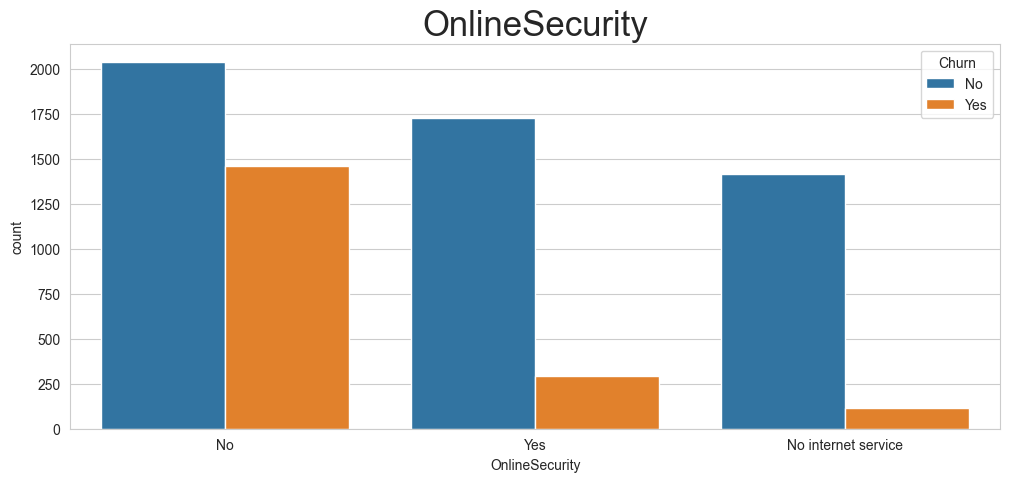

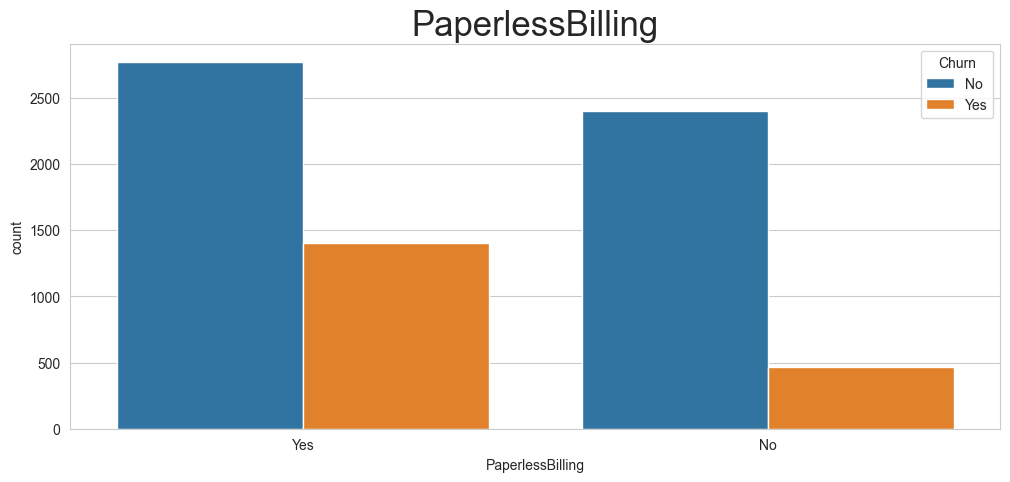

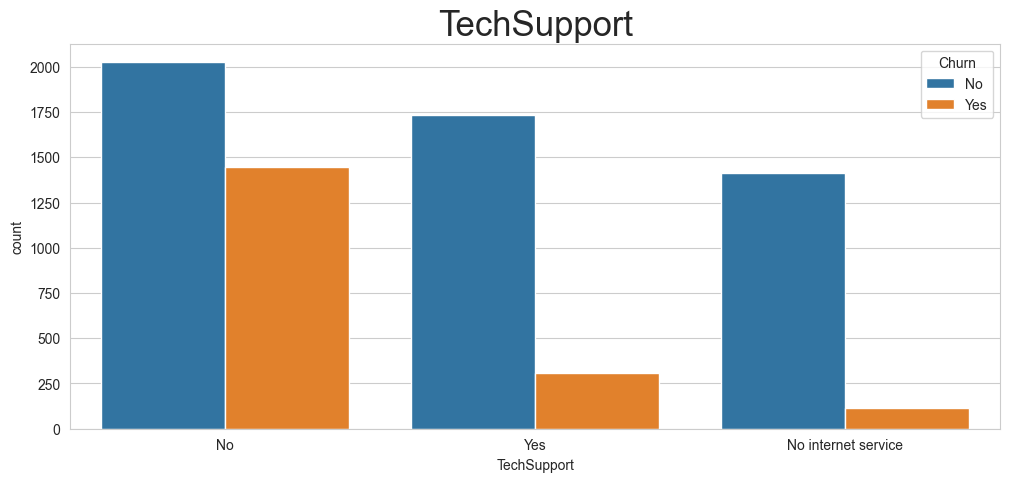

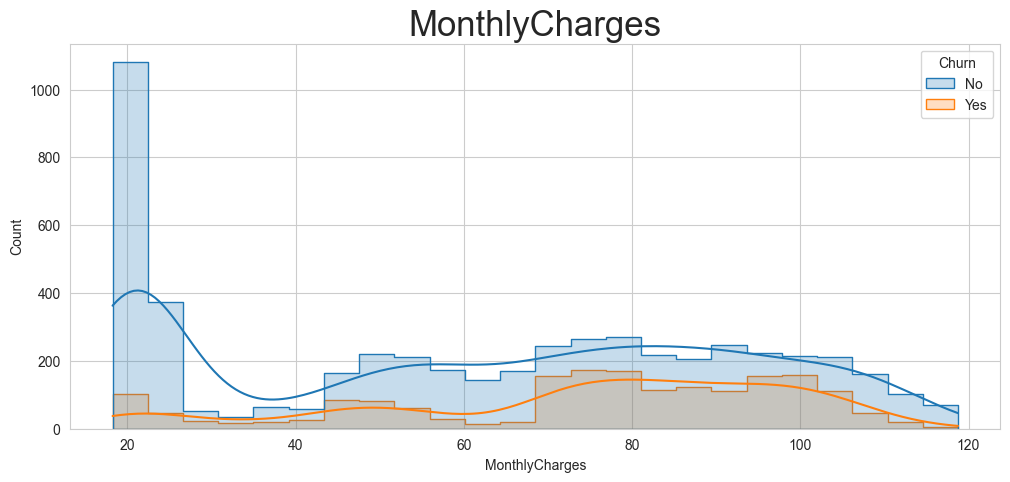

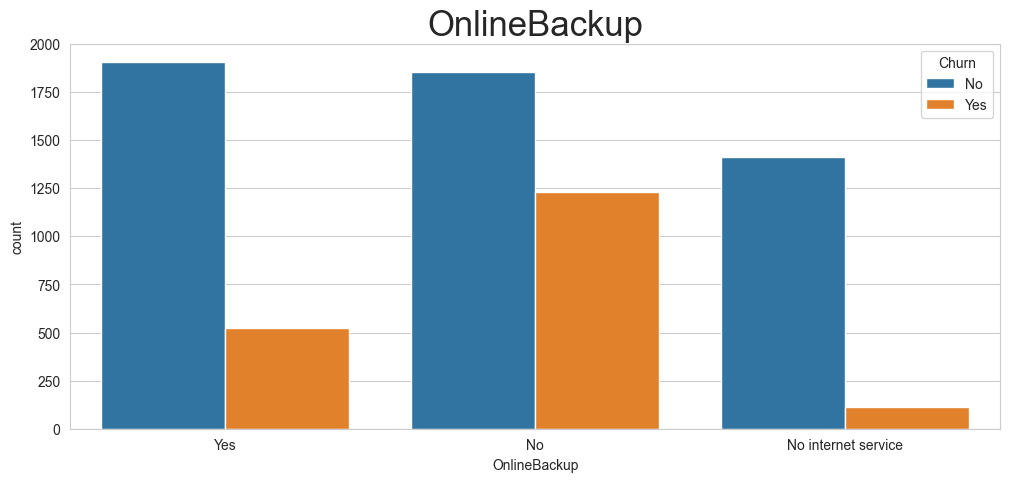

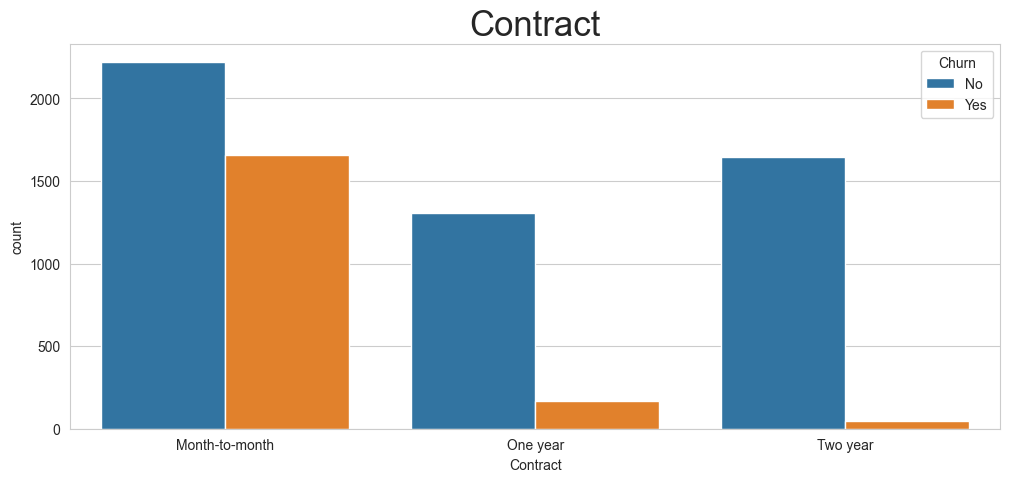

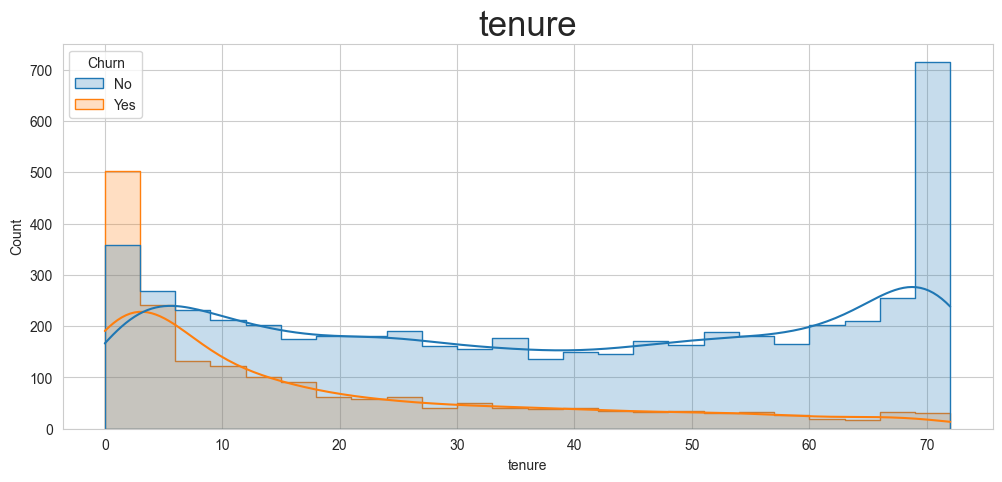

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

target = df['Churn']
def plot_categorical(df, col, target):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col}", fontsize=25)
    plt.show()


def plot_numerical(df, col, target):
    plt.figure(figsize=(12, 5))
    sns.histplot(data=df, x=col, hue=target, kde=True, element="step", bins=24)
    plt.title(f"{col}", fontsize=25)
    plt.show()


for col in vars_to_study:
    cat_vars_to_study = list(set(vars_to_study) & set(df_cat_vars))
    if col in cat_vars_to_study:
        plot_categorical(df, col, target)
        print("\n\n")
    else:
        plot_numerical(df, col, target)
        print("\n\n")
df_cat_vars

---

## Parallel Plot

Create a separate DataFrame and transform `tenure` (numerical) into bins (categorical) for visualising at `parallel_categories()` plot

In [ ]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
tenure_map = [-np.inf, 6, 12, 18, 24, np.inf]
disc = ArbitraryDiscretiser(binning_dict={'tenure': tenure_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

In [ ]:
disc.binner_dict_['tenure']

Create a map to replace the `tenure` variable with more informative levels.

In [ ]:
n_classes = len(tenure_map) - 1
classes_ranges = disc.binner_dict_['tenure'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

labels_map


Replace using `.replace()`

In [ ]:
df_parallel['tenure'] = df_parallel['tenure'].replace(labels_map)
df_parallel.head()

Creates multi-dimensional categorical data plot

In [ ]:
import plotly.express as px
df_parallel['Churn'] = df_parallel['Churn'].apply(lambda x: 0 if x == 'No' else 1)
fig = px.parallel_categories(df_parallel, color="Churn")
fig.show()

---

# Conclusions and Next steps

What can we gather from the correlation study:
* A churned customer typically has a month-to-month contract.
* A churned customer typically has low tenure levels.
* A churned customer typically doesn't have online backup.
* A churned customer typically doesn't have online security.
* A churned customer typically doesn't have tech support.